In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc("font", family='AppleGothic')

In [4]:
order_result = pd.read_csv("ORD_RESULT.csv")
order_table = pd.read_csv("orders_table.csv", encoding="cp949")

In [5]:
order_result = order_result[order_result["ORD_NO"] != "Null"]
order_result

,Unnamed: 0,VehicleID,Sequence,ORD_NO,SiteCode,ArrivalTime,WaitingTime,ServiceTime,DepartureTime,Delivered
1,1,VEH_42,2,MF2305036201264,D_263,2023-05-01 00:17:29.173947960,0,60,2023-05-01 01:17:29.173947960,Yes
2,2,VEH_42,3,M18384761,D_301,2023-05-01 00:30:27.210348900,60,60,2023-05-01 02:30:27.210348900,Yes
3,3,VEH_42,4,M18434020,D_1180,2023-05-01 00:35:28.298508480,120,60,2023-05-01 03:35:28.298508480,Yes
5,5,VEH_42,2,MF2304276175962,D_1180,2023-05-01 12:17:29.173947960,0,60,2023-05-01 13:17:29.173947960,Yes
6,6,VEH_42,3,MF2304276176029,D_1180,2023.5.1 12:00,60,60,2023.5.1 14:00,Yes
...,...,...,...,...,...,...,...,...,...,...
8396,8396,VEH_1022,2,M18394270,D_693,2023-05-06 14:31:53.847248340,0,60,2023-05-06 15:31:53.847248340,Yes
8399,8399,VEH_218,2,20230506B478539_001,D_1,2023-05-06 19:52:50.458626240,0,60,2023-05-06 20:52:50.458626240,Yes
8400,8400,VEH_218,3,20230506B478498_001,D_109,2023-05-06 18:40:53.330954520,60,60,2023-05-06 20:40:53.330954520,Yes
8403,8403,VEH_1018,2,M18394323,D_414,2023-05-06 19:43:12.319861020,0,60,2023-05-06 20:43:12.319861020,Yes


In [6]:
order_table

,주문ID,하차지_위도,하차지_경도,착지ID,CBM,하차가능시간_시작,하차가능시간_종료,하차작업시간(분),터미널ID,date,Group
0,20230501B464859_001,36.448483,127.409240,D_1,27.893621,18:00,2:00,60,O_179,2023-05-01,0
1,20230501B464914_001,36.448483,127.409240,D_1,42.669815,18:00,2:00,60,O_673,2023-05-01,1
2,20230501B464917_001,36.448483,127.409240,D_1,27.343155,18:00,2:00,60,O_673,2023-05-01,2
3,20230501B464927_001,36.448483,127.409240,D_1,19.722170,18:00,2:00,60,O_179,2023-05-01,3
4,20230501B464944_001,36.448483,127.409240,D_1,28.031678,18:00,2:00,60,O_673,2023-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...
15612,PND000304,36.639999,127.463585,D_2902,19.244336,10:00,17:00,60,O_580,2023-05-01,1
15613,PND000380,37.342094,127.859909,D_2917,23.038265,18:00,2:00,60,O_349,2023-05-05,1
15614,PND000469,37.332897,129.070282,D_2965,18.741028,00:00,6:00,60,O_553,2023-05-03,0
15615,PND000498,37.654900,127.236572,D_1567,28.702799,00:00,6:00,60,O_349,2023-05-04,2


In [19]:
timeSum = 0
timeList = []
for index,row in order_result.iterrows():
    ord_id = row["ORD_NO"]
    deptime = row["DepartureTime"]
    ordtemp = order_table.loc[order_table["주문ID"] == ord_id]
    if ordtemp["Group"].iloc[0] == 0:
        ordArrTime = pd.to_datetime(ordtemp["date"]) + pd.Timedelta(hours = 0)
    elif ordtemp["Group"].iloc[0] == 1:
        ordArrTime = pd.to_datetime(ordtemp["date"]) + pd.Timedelta(hours = 6)
    elif ordtemp["Group"].iloc[0]:
        ordArrTime = pd.to_datetime(ordtemp["date"]) + pd.Timedelta(hours = 12)
    else:
        ordArrTime = pd.to_datetime(ordtemp["date"]) + pd.Timedelta(hours = 18)
    calcTime = pd.to_datetime(row["DepartureTime"]) - ordArrTime 
    timeList.append(calcTime)

    

In [25]:
import datetime

time_list = []
for i in timeList:
    time_d_min = i / datetime.timedelta(minutes=1)
    time_list.append(time_d_min)
    timeSum += time_d_min
time_list

[11993    77.486232
 Name: date, dtype: float64,
 9730    150.453506
 Name: date, dtype: float64,
 11399    215.471642
 Name: date, dtype: float64,
 11499    77.486232
 Name: date, dtype: float64,
 11503    120.0
 Name: date, dtype: float64,
 11504    437.486232
 Name: date, dtype: float64,
 9888    488.138508
 Name: date, dtype: float64,
 10765    158.21922
 Name: date, dtype: float64,
 11393    120.0
 Name: date, dtype: float64,
 7161    543.387568
 Name: date, dtype: float64,
 7157    520.117401
 Name: date, dtype: float64,
 9762    138.655066
 Name: date, dtype: float64,
 9905    152.466745
 Name: date, dtype: float64,
 825    179.83966
 Name: date, dtype: float64,
 657    120.0
 Name: date, dtype: float64,
 893    183.662279
 Name: date, dtype: float64,
 11414    82.583421
 Name: date, dtype: float64,
 9998    158.21922
 Name: date, dtype: float64,
 9994    120.0
 Name: date, dtype: float64,
 15394    258.642188
 Name: date, dtype: float64,
 15406    120.0
 Name: date, dtype: floa

In [48]:
timeSum = 0
new_list = []
for i in time_list:
    new_list.append(float(i))
    timeSum = float(timeSum + i)

/var/folders/3l/z2_cjhyd20v1_yppby93tmnh0000gn/T/ipykernel_4217/1735814965.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  new_list.append(float(i))
/var/folders/3l/z2_cjhyd20v1_yppby93tmnh0000gn/T/ipykernel_4217/1735814965.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  timeSum = float(timeSum + i)


In [49]:
new_list

[77.486232466,
 150.453505815,
 215.471641808,
 77.486232466,
 120.0,
 437.486232466,
 488.138508392,
 158.219219929,
 120.0,
 543.38756827,
 520.1174005,
 138.655065601,
 152.466744766,
 179.839659537,
 120.0,
 183.662279333,
 82.58342056,
 158.219219929,
 120.0,
 258.642188474,
 120.0,
 514.570281897,
 217.147951092,
 135.809799191,
 202.065492911,
 515.11857028,
 150.137722085,
 170.041145289,
 68.100291378,
 520.802477002,
 170.041145289,
 131.078890403,
 176.760791604,
 297.282089014,
 165.091264493,
 174.140127584,
 564.967670591,
 132.621227715,
 131.699467526,
 107.13749450598333,
 454.712222161,
 131.863516241,
 284.322927664,
 135.822503971,
 165.336800043,
 549.581567301,
 101.182312559,
 104.753316454,
 276.11819555,
 155.103431686,
 302.408689798,
 120.0,
 260.902665344,
 110.050661283,
 135.822503971,
 249.958683219,
 192.264232792,
 496.5302523959833,
 88.824566013,
 201.48077769,
 258.642188474,
 159.660624923,
 173.38756827,
 248.200187581,
 584.65428186,
 149.89741782

In [53]:
평균 = timeSum/ len(new_list)
평균

260.58800452821663

In [54]:
최대 = max(new_list)
최대

771.166915116

(array([1076., 1265.,  610.,  199.,   33.,  298.,  457.,  206.,   77.,
          20.]),
 array([ 60.        , 131.11669151, 202.23338302, 273.35007453,
        344.46676605, 415.58345756, 486.70014907, 557.81684058,
        628.93353209, 700.0502236 , 771.16691512]),
 <BarContainer object of 10 artists>)

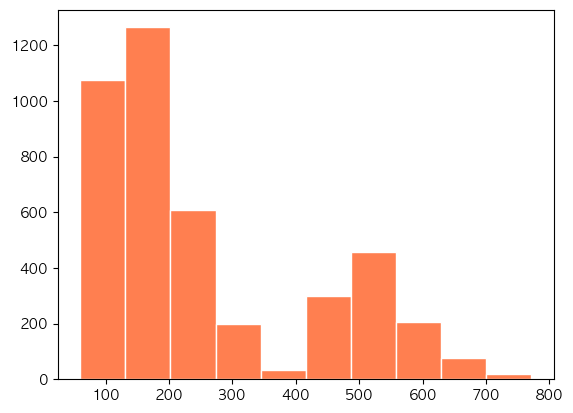

In [61]:
# plt.hist(new_list, edgecolor='white', color="orangered")  # bins는 구간(bin)의 개수를 나타냅니다
plt.hist(new_list, edgecolor='white', color="coral")  # bins는 구간(bin)의 개수를 나타냅니다
# plt.hist(new_list, edgecolor='white', color="tomato")  # bins는 구간(bin)의 개수를 나타냅니다

In [69]:
118551 / 365 / 1* 1000 * 10

3247972.6027397257

In [70]:
1076043 / 6

179340.5